# Drug Consumption Classification
## Juan Manuel González Ascencio

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('drug_consumption.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

## Variables 

Podemos ver que tenemos 32 columnas y mas de 1800 entradas con las cuales podemos empezar a investigar, antes de explicar las diferentes variables que tenemos cabe explicar un poco algunos datos raros que tenemos. Como podemos ver, los valores de edad, genero, educación y país tienen valores flotantes, lo cual no nos dice nada ¿comó un país va a ser 0.98?

Leyendo un poco al respecto podemos ver que el creador del data set nos dice que hagamos lo siguiente:

## Age 
Esta es una variable que nos da un rango de edades de la persona consiumiendo droga.

In [4]:
age_col = {
          -0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }
data['Age'] = data['Age'].replace(age_col)

data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25 - 34,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35 - 44,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35 - 44,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Gender
Nos describe el genero del participante

In [5]:
gender_col = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }
data['Gender'] = data['Gender'].replace(gender_col)

data.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25 - 34,Male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35 - 44,Male,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35 - 44,Female,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [17]:
# Conteo de gender 
data['Gender'].value_counts()

Gender
Male      943
Female    942
Name: count, dtype: int64

Podemos ver que en este estudio se estudió a la mitad de participantes hombres y la otra mitad mujeres 

## Education
Describe el nivel de educación que tiene el participante

In [6]:
education_col = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }
data['Education'] = data['Education'].replace(education_col)

data.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25 - 34,Male,Doctorate Degree,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35 - 44,Male,Professional Certificate/ Diploma,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters Degree,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35 - 44,Female,Doctorate Degree,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


¿Entre mas educación menos consumo de drogas?

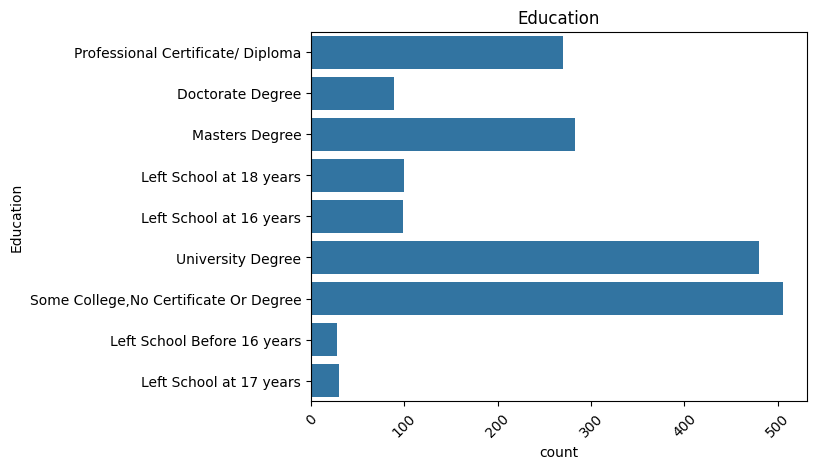

In [15]:
#Conteo de education 
sns.countplot(data['Education'])
plt.xticks(rotation=45)
plt.title('Education')
plt.show()


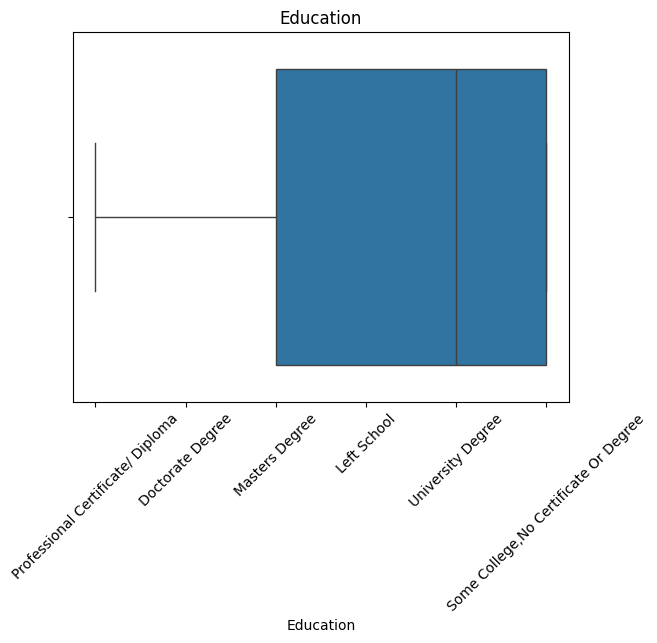

In [25]:
#Hacemos un diagrama boxplot para ver la distribución de education 

sns.boxplot(x='Education', data=data)
plt.xticks(rotation=45)
plt.title('Education')
plt.show()

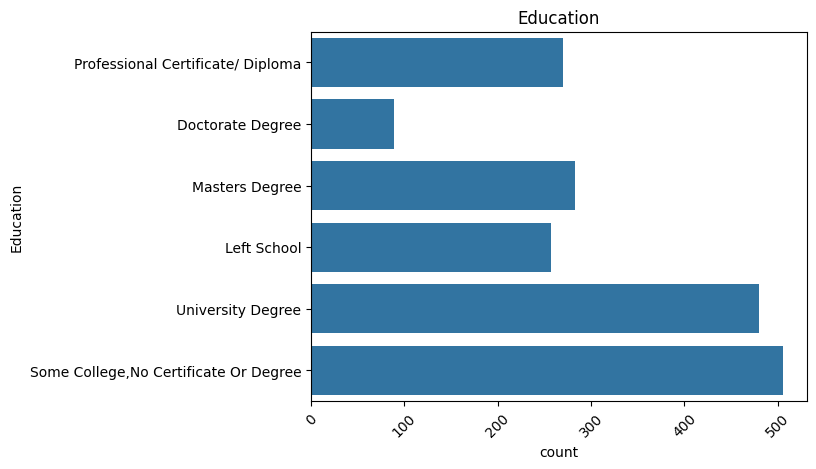

In [16]:
#Agrupamos los left school before 16 years, left school at 16 years, left school at 17 years y left school at 18 years en una sola categoria
data['Education'] = data['Education'].replace({'Left School Before 16 years': 'Left School', 'Left School at 16 years': 'Left School', 'Left School at 17 years': 'Left School', 'Left School at 18 years': 'Left School'})

#Graficamos de nuevo

sns.countplot(data['Education'])
plt.xticks(rotation=45)
plt.title('Education')
plt.show()

Mi teoría era que las personas con menos educación (dejar la escuela antes de los 18 años) serían los mas propensos a drogarse, pero eso es falso como podemos ver. El grpo de personas que mas se droga son los de universidad.

## Country
País de recidencia actual del participante

In [7]:
country_col = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }
data['Country'] = data['Country'].replace(country_col)

data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25 - 34,Male,Doctorate Degree,UK,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters Degree,UK,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35 - 44,Female,Doctorate Degree,UK,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


/tmp/ipykernel_15963/1148569451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=data, palette='viridis')


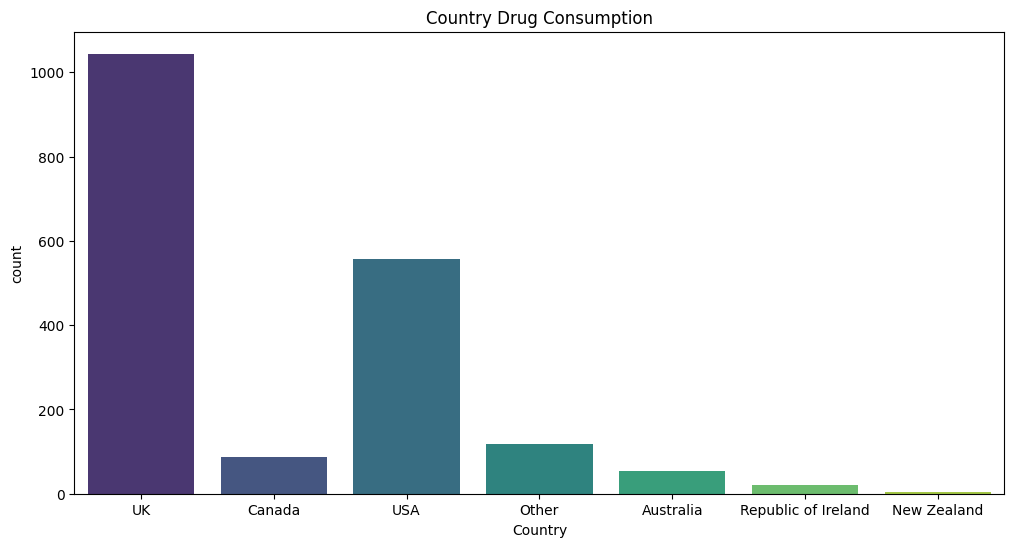

In [14]:
#Veamos cual es el paías que más consume drogas
plt.figure(figsize=(12,6))
sns.countplot(x='Country', data=data, palette='viridis')
plt.title('Country Drug Consumption')
plt.show()

Tenemos mayor cantidad de datos en el Reino Unido, debido a la cantidad de datos que poseemos no podemos sacar muchas conclusiónes sobre esto, unicmante saber de donde vienen nuestros datos.

## Ethnicity
Etnicidad del participante

In [8]:
ethnicity_col = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }
data['Ethnicity'] = data['Ethnicity'].replace(ethnicity_col)

## Usage

Fecha de la ultima dosis de esa droga


In [9]:
usage_col = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
    }
data['Alcohol'] = data['Alcohol'].replace(usage_col)
data['Amphet'] = data['Amphet'].replace(usage_col)
data['Amyl'] = data['Amyl'].replace(usage_col)
data['Benzos'] = data['Benzos'].replace(usage_col)
data['Caff'] = data['Caff'].replace(usage_col)
data['Cannabis'] = data['Cannabis'].replace(usage_col)
data['Choc'] = data['Choc'].replace(usage_col)
data['Coke'] = data['Coke'].replace(usage_col)
data['Crack'] = data['Crack'].replace(usage_col)
data['Ecstasy'] = data['Ecstasy'].replace(usage_col)
data['Heroin'] = data['Heroin'].replace(usage_col)
data['Ketamine'] = data['Ketamine'].replace(usage_col)
data['Legalh'] = data['Legalh'].replace(usage_col)
data['LSD'] = data['LSD'].replace(usage_col)
data['Meth'] = data['Meth'].replace(usage_col)
data['Mushrooms'] = data['Mushrooms'].replace(usage_col)
data['Nicotine'] = data['Nicotine'].replace(usage_col)
data['Semer'] = data['Semer'].replace(usage_col)
data['VSA'] = data['VSA'].replace(usage_col)

data.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


Sabeindo que son las variables podemos empezar a investigar un poco mas sobre ellas, vamos a hacer un pequeño conteo rapido 


/tmp/ipykernel_15963/779942502.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Age'], palette='viridis')


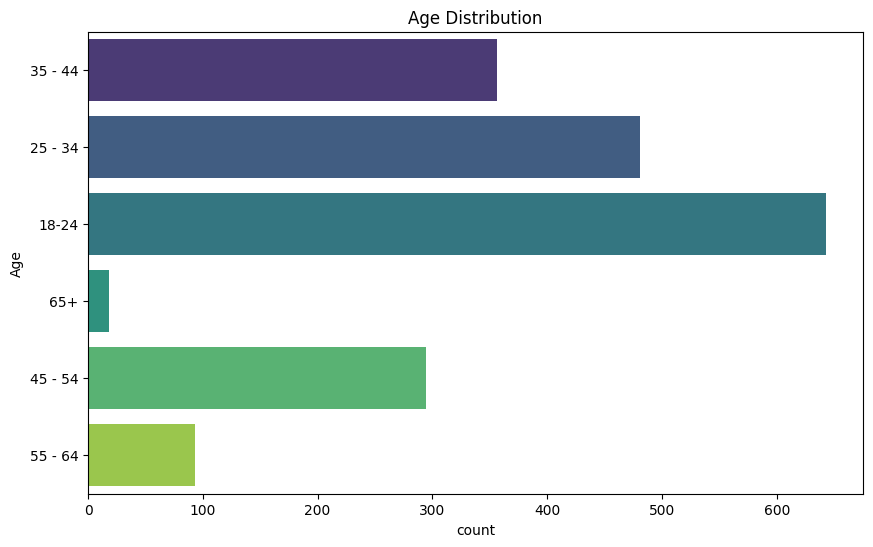

In [13]:
#Hacemos un conteo de las edades

data['Age'].value_counts()
#graficamos

plt.figure(figsize=(10,6))
sns.countplot(data['Age'], palette='viridis')
plt.title('Age Distribution')
plt.show()

Podemos afirmar que la gente joven es la que mas consume drogas

# Transtornos de personalidad

## Nscore 
Nscore is NEO-FFI-R Neuroticism. Neuroticism is one of the Big Five higher-order personality traits in the study of psychology. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness.

## Escore
EScore: Escore (Real) is NEO-FFI-R Extraversion. Extraversion is one of the five personality traits of the Big Five personality theory. It indicates how outgoing and social a person is. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy.

## Oscore
Oscore: Oscore (Real) is NEO-FFI-R Openness to experience. Openness is one of the five personality traits of the Big Five personality theory. It indicates how open-minded a person is. A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. Individuals who are low in openness to experience would rather not try new things. They are close-minded, literal and enjoy having a routine.

## Ascore
Ascore: Ascore(Real) is NEO-FFI-R Agreeableness. Agreeableness is one of the five personality traits of the Big Five personality theory. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others

## Cscore
Cscore: Cscore (Real) is NEO-FFI-R Conscientiousness. Conscientiousness is one of the five personality traits of the Big Five personality theory. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously. Their methodic planning and perseverance usually makes them highly successful in their chosen occupation. 


## Visualización con histogramas y boxplots

In [28]:
num_cols = data.select_dtypes(include=['float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

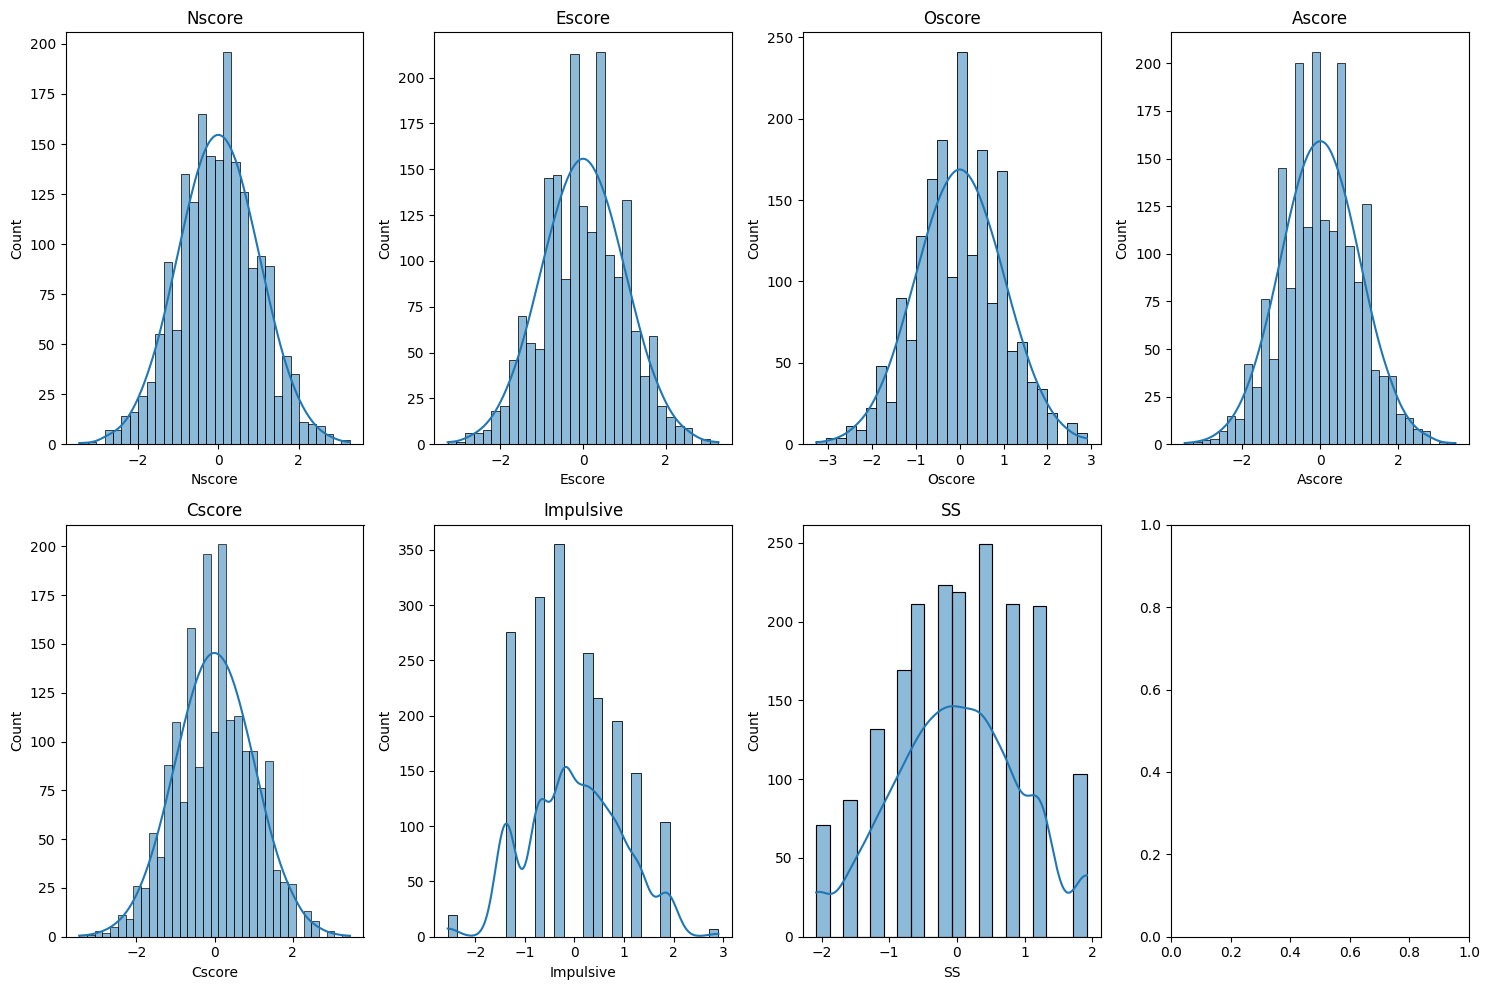

In [30]:
f, ax = plt.subplots(2,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = data, x = cols , ax= ax[index], kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

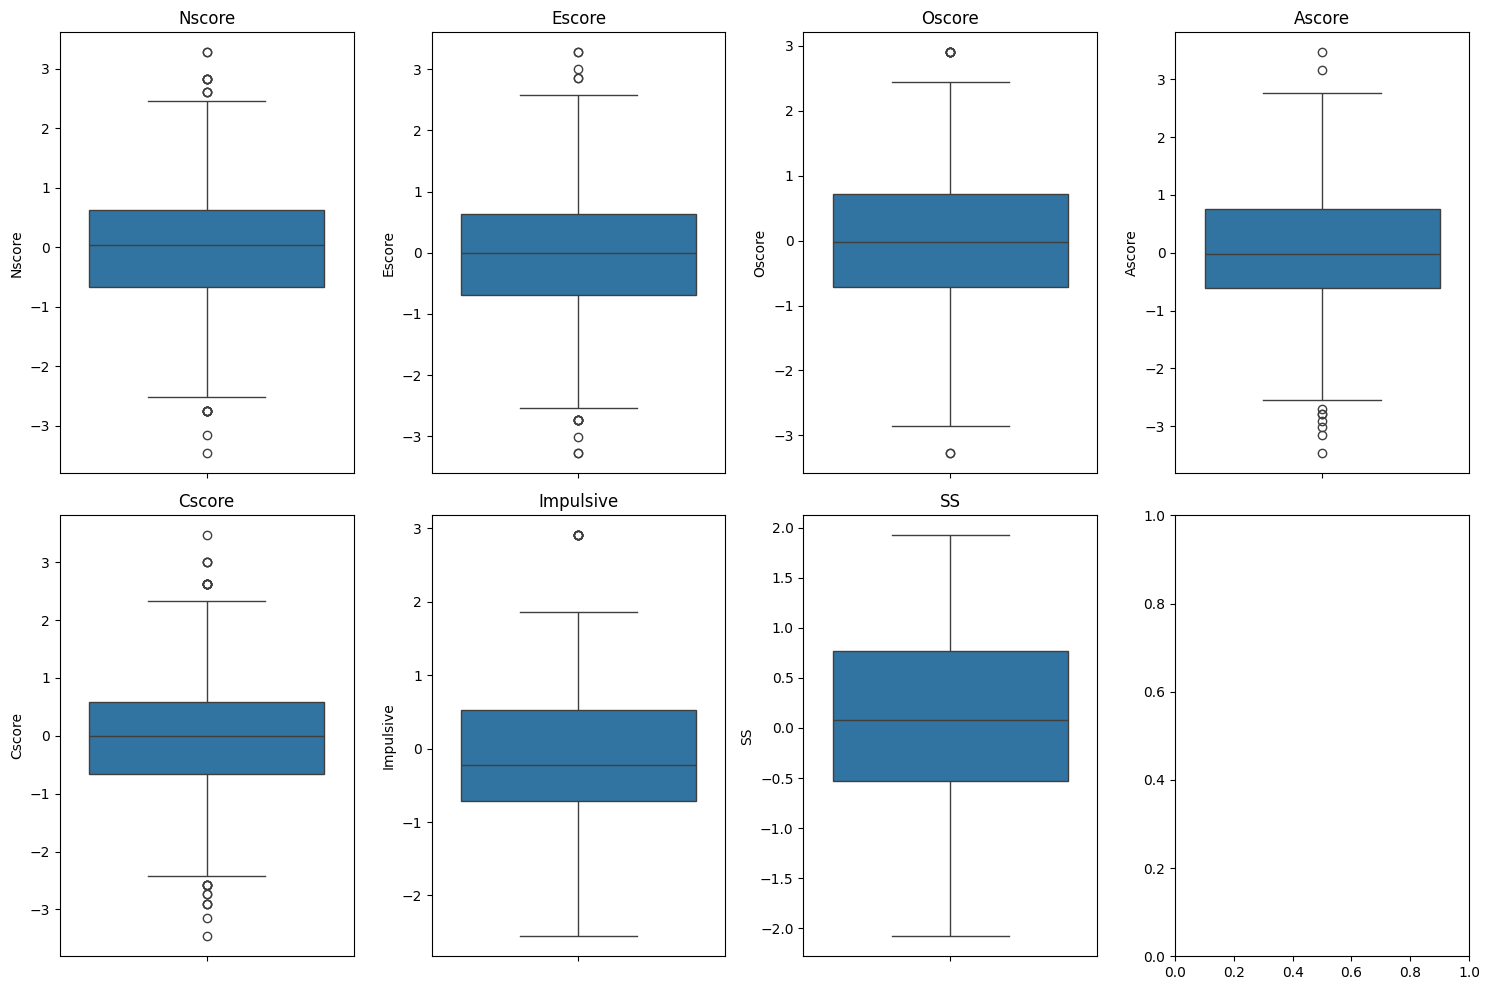

In [31]:
f, ax= plt.subplots(2,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data = data, y = cols , ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

Viendo esto nos podemos dar cuenta de que la distrubición es normal, por lo que entre mas se acerca al 0 los valores de uso de drogas suben, lo cual es muy interesante ya que este comportamiento se repite en varios de los transtornos de personalidad.

Esto nos puede hablar tambien de que no hay muchas personas con trantornos de personalidad fuertes en el estudió.

Los outliers se mantienen en un rango aceptable, por lo que no es necesario el hacer limpiea de datos.

## ¿Cómo nos ayuda en un ambiente de negocio las visualizaciones? Justifica tu respuesta con las visualizaciones
Imaginemos que trabajamos para una farmacéutica que quiere saber más sobre el consumo de drogas en la población, si les presento únicamente el dataframe con los datos crudos, ¿serían capaz de tomar decisiones adecuadas? Probablemente no, por lo que es más sencillo para ellos poder ver una gráfica de la distribución de edad o de las variables que sean de su interés, para que tanto gente técnica como no técnica sean capaces de comprender los datos y se puedan tomar decisiones de una manera más adecuada.